In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('/content/drive/MyDrive/DataSets/Nutrition.csv')


In [96]:
data.head()

,Duration,Pulse,Maxpulse,Calories
0,60,110,130,409.1
1,60,117,145,479.0
2,60,103,135,340.0
3,45,109,175,282.4
4,45,117,148,406.0


In [3]:
data.shape


(169, 4)

In [4]:
data.info()
print("*"*25)
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Duration  169 non-null    int64  
 1   Pulse     169 non-null    int64  
 2   Maxpulse  169 non-null    int64  
 3   Calories  164 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 5.4 KB
*************************


,0
Duration,0
Pulse,0
Maxpulse,0
Calories,5


In [5]:
print(data['Calories'].value_counts(),'\n',
data['Pulse'].value_counts(),'\n',
data['Duration'].value_counts(),'\n',
data['Maxpulse'].value_counts(),'\n',
data['Calories'].value_counts())

Calories
300.0    10
500.0     3
270.4     2
225.3     2
500.4     2
         ..
413.0     1
450.7     1
238.0     1
486.0     1
330.4     1
Name: count, Length: 142, dtype: int64 
 Pulse
100    19
90     12
103     9
109     9
107     8
108     7
97      7
110     7
106     6
111     6
98      6
105     6
102     6
104     4
114     4
95      3
115     3
117     3
118     3
136     3
93      3
92      3
99      2
151     2
112     2
123     2
80      2
150     2
101     2
149     1
116     1
120     1
85      1
122     1
141     1
113     1
119     1
124     1
159     1
137     1
152     1
130     1
121     1
153     1
83      1
129     1
125     1
Name: count, dtype: int64 
 Duration
60     79
45     35
30     16
20      9
90      8
150     4
180     3
120     3
210     2
160     2
15      2
75      2
80      1
300     1
270     1
25      1
Name: count, dtype: int64 
 Maxpulse
120    16
130     9
127     9
136     8
124     7
131     6
132     5
151     5
129     5
138     4
137     

In [6]:
data.duplicated().sum()

7

In [7]:
data=data.drop_duplicates()
data.duplicated().sum()

0

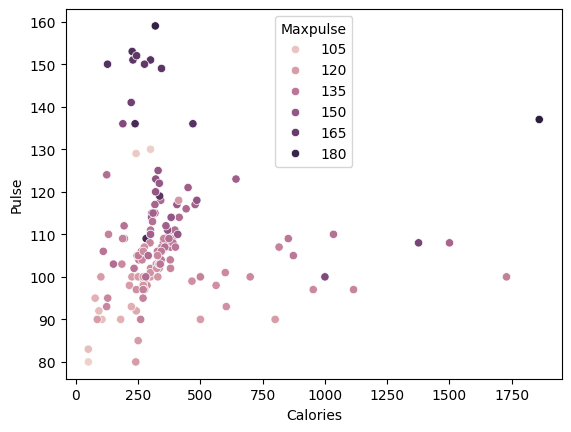

In [8]:
sns.scatterplot(x=data['Calories'],y=data['Pulse'],data=data,hue='Maxpulse')
plt.xlabel('Calories')
plt.show()

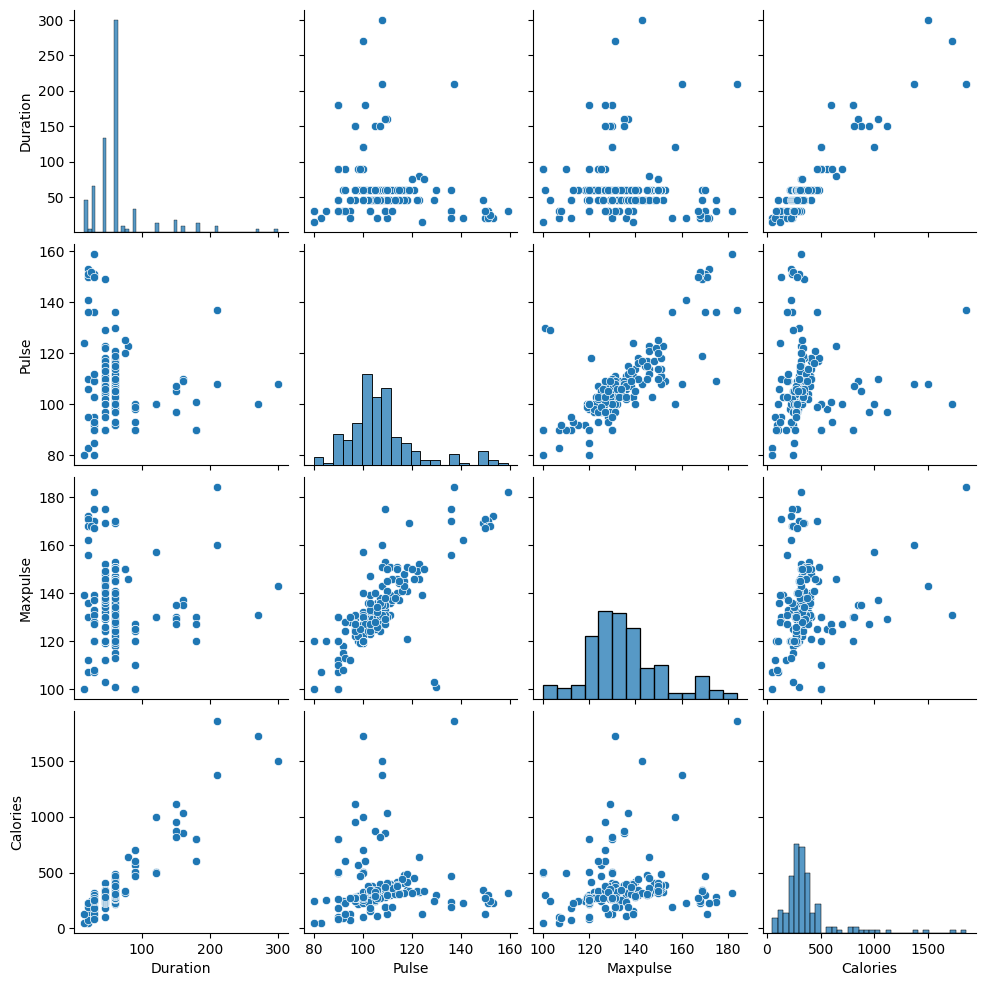

In [9]:
sns.pairplot(data)
plt.show()

<Axes: >

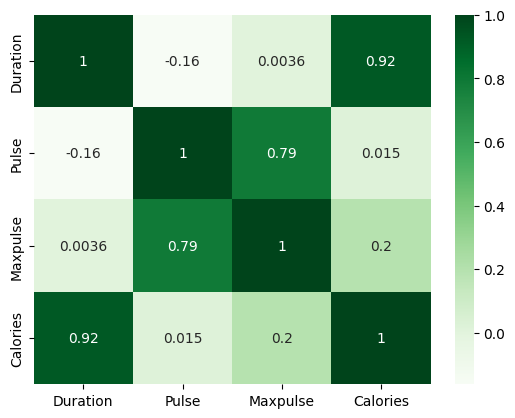

In [10]:
sns.heatmap(data.corr(), annot=True,cmap="Greens")


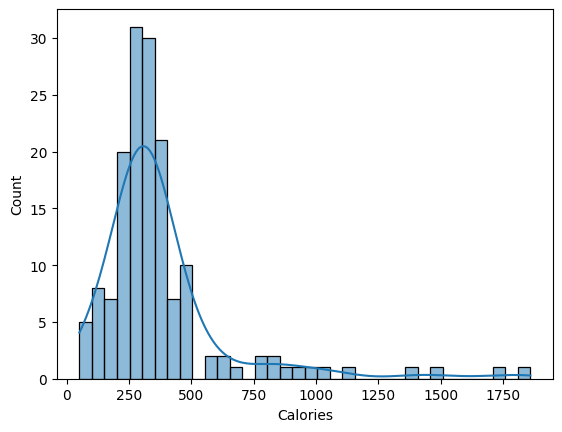

In [11]:
sns.histplot(data['Calories'], kde=True)
plt.show()


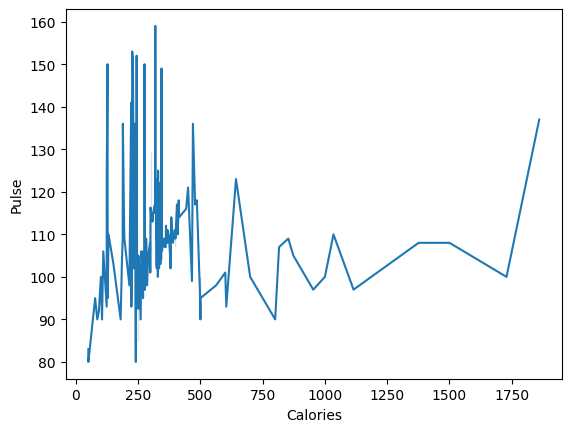

In [12]:
sns.lineplot(x='Calories', y='Pulse', data=data)
plt.show()


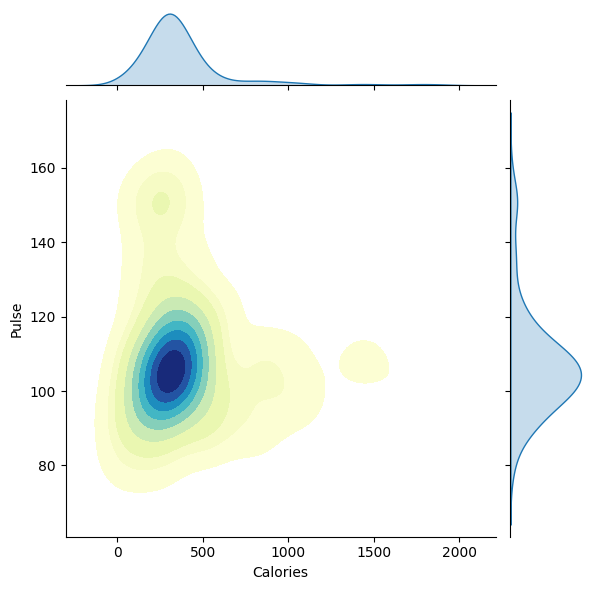

In [13]:
sns.jointplot(x='Calories', y='Pulse', data=data,kind="kde",fill="True",cmap="YlGnBu")
plt.show()

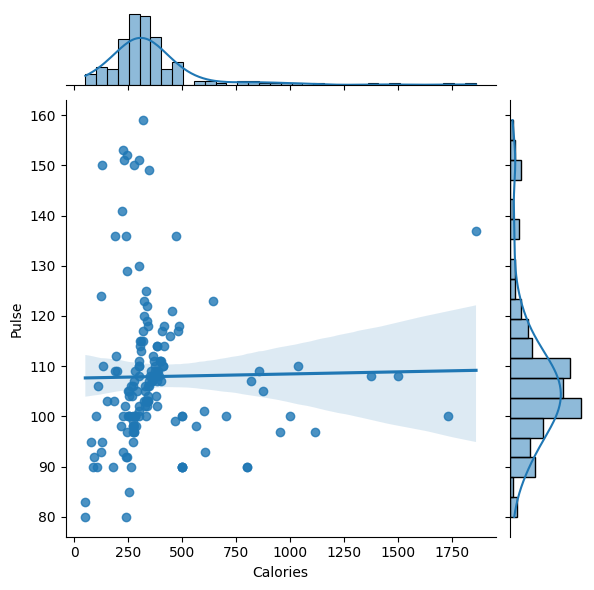

In [14]:
sns.jointplot(x='Calories', y='Pulse', data=data,kind="reg")
plt.show()

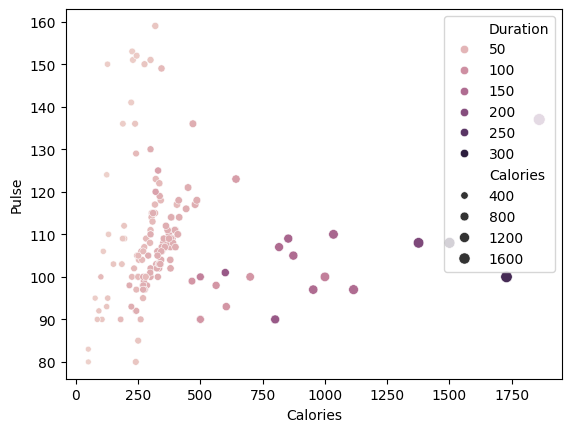

In [15]:
sns.scatterplot(x='Calories', y='Pulse', data=data,hue='Duration',size="Calories")
plt.show()

In [16]:
Q1=data["Calories"].quantile(0.25)
Q2=data["Calories"].quantile(0.75)
IQR=Q2-Q1
lower_bound=Q1-1.5*IQR
upper_bound=Q2+1.5*IQR
datax=data[(data["Calories"]>=lower_bound)&(data["Calories"]<=upper_bound)]

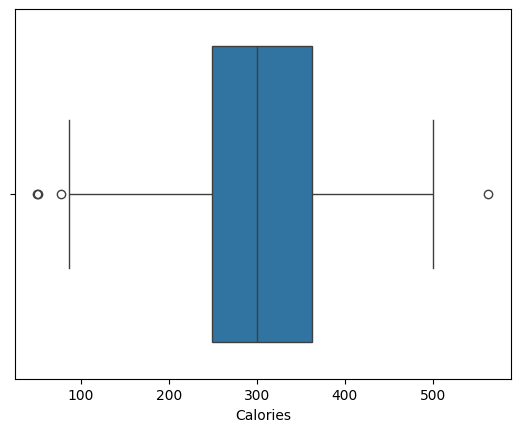

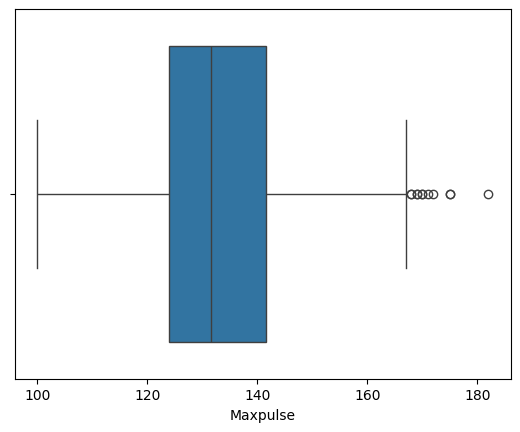

In [17]:
sns.boxplot(x=datax["Calories"])
plt.show()
sns.boxplot(x=datax["Maxpulse"])
plt.show()


In [18]:
datax.shape

(140, 4)

In [19]:
def outlier_detector(column,data):

    Q1=data[column].quantile(0.25)
    Q2=data[column].quantile(0.75)
    IQR=Q2-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q2+1.5*IQR
    data_without_outliers=data[(data[column]>=lower_bound)&(data[column]<=upper_bound)]
    #print(data_without_outliers.shape)
    return data_without_outliers

In [20]:
for i in data.columns:
    print(i,data[i].shape)
    #data with outliers

Duration (162,)
Pulse (162,)
Maxpulse (162,)
Calories (162,)


In [21]:
for i in data.columns:
    data_without_outliers=outlier_detector(i,data)
    print(i,data_without_outliers.shape)

Duration (127, 4)
Pulse (144, 4)
Maxpulse (149, 4)
Calories (140, 4)


In [22]:
data=data.fillna(data.mean())
data.isnull().sum()

,0
Duration,0
Pulse,0
Maxpulse,0
Calories,0


In [23]:
import numpy as np
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
def evaluation(y_test,y_pred):
    r2=r2_score(y_test,y_pred)
    print("r2_score:",r2)
    mae=mean_absolute_error(y_test,y_pred)
    print("mean_absolute_error:",mae)
    mse=mean_squared_error(y_test,y_pred)
    rmse=np.sqrt(mse)
    print("mean_squared_error:",rmse)

In [24]:
def test_vs_pred(y_test, y_pred):
    sns.scatterplot(x=y_test, y=y_pred)
    plt.plot(y_pred, y_pred, color="forestgreen")
    plt.xlabel('y_test')
    plt.ylabel('y_pred')

    plt.show()

In [25]:
# from sklearn.impute import KNNImputer
# imputer=KNNImputer()
# for i in data_without_outliers.columns:
#     data_without_outliers[i]=imputer.fit_transform(data_without_outliers[[i]])

In [26]:
from sklearn.model_selection import train_test_split
x=data_without_outliers.drop('Calories',axis=1)
y=data_without_outliers['Calories']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [106]:
print(type(x_test))

<class 'pandas.core.frame.DataFrame'>


r2_score: 0.8634494860446276
mean_absolute_error: 28.580285714285704
mean_squared_error: 36.07360995833748




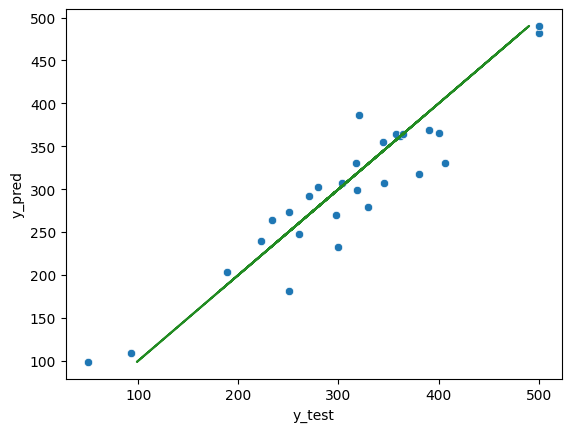

In [118]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)

evaluation(y_test,y_pred)#evaluation for RandomForestRegressor
print("\n")
test_vs_pred(y_test,y_pred)

r2_score: 0.8963587215920041
mean_absolute_error: 23.85952380952381
mean_squared_error: 31.427462462397386




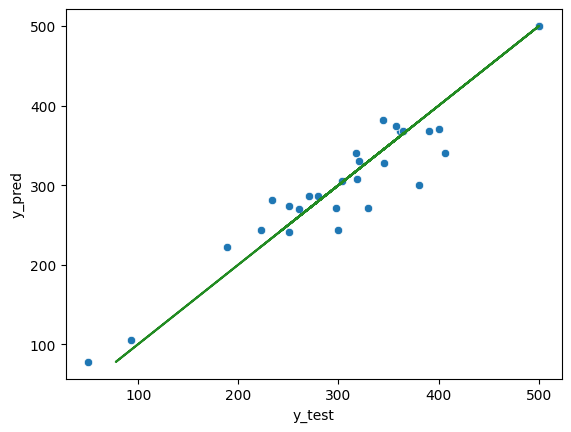

In [28]:
from sklearn.tree import DecisionTreeRegressor
DTmodel=DecisionTreeRegressor()
DTmodel.fit(x_train,y_train)
y_predDT=DTmodel.predict(x_test)

evaluation(y_test,y_predDT)#evaluation for DecisionTreeRegressor
print("\n")
test_vs_pred(y_test,y_predDT)

r2_score: 0.8967962942566912
mean_absolute_error: 22.98095238095238
mean_squared_error: 31.361049038981413




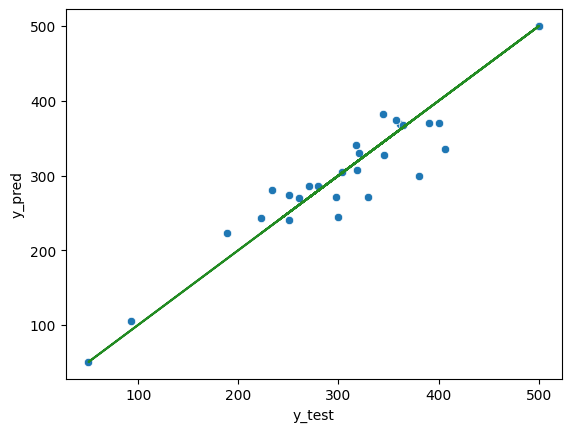

In [29]:
from sklearn.linear_model import LinearRegression
LRmodel=DecisionTreeRegressor()
LRmodel.fit(x_train,y_train)
y_predLR=LRmodel.predict(x_test)

evaluation(y_test,y_predLR)#evaluation for LinearRegression
print("\n")
test_vs_pred(y_test,y_predLR)

In [119]:
from sklearn.model_selection import cross_val_score#cv=k_folds
# RModelscore=cross_val_score(RandomForestRegressor(),x_train, y_train,cv=10)
# print(f"model Average:{RModelscore.mean()}")
# DModelscore=cross_val_score(DecisionTreeRegressor(),x_train, y_train,cv=10)
# print(f"model Average:{DModelscore.mean()}")
# LRModelscore=cross_val_score(LinearRegression(),x_train, y_train,cv=10)
# print(f"model Average:{LRModelscore.mean()}")

models_list=[RandomForestRegressor(),DecisionTreeRegressor(),LinearRegression()]
cv=10
def best_model_selector(model,cv):
        modelscore=cross_val_score(model,x_train, y_train,cv=cv)
        return list(modelscore)

In [120]:
modelx=[]
for i in models_list:
    #modelx.append(i)
    modelx.append(best_model_selector(i,10))
print(modelx)

[[0.6143941350563985, 0.9182540586416719, 0.8959681613027524, 0.8516263137035198, 0.9388252498076576, 0.5879976885109174, 0.7594948599831232, 0.8750449189429221, 0.3781751539375151, 0.7660204148959174], [0.4731249099374324, 0.7146824593903196, 0.6753622605908779, 0.5960989231353175, 0.8926565059754459, 0.49036219865237196, 0.290358904948114, 0.7857643868298915, 0.19416938311636578, 0.4048799304091719], [0.6953833899621119, 0.528267756357828, 0.8865034970583424, 0.6019091524585964, 0.9223907194092296, 0.6952662612577255, 0.5845461154571139, 0.8528982034085544, 0.3823812443479436, 0.823952116411879]]


In [121]:
rfr=[]
dtr=[]
lr=[]
rfr=modelx[0]
dtr=modelx[1]
lr=modelx[2]


In [122]:
best=[]
best.append(np.mean(rfr))
best.append(np.mean(dtr))
best.append(np.mean(lr))
print(best)
bdict={"rfr":np.mean(rfr),
       "dtr":np.mean(dtr),"lr":np.mean(lr)}
bestx=max(bdict)
print(f"best performing model is:{bestx}")

[0.7585800954782396, 0.5517459862985309, 0.6973498456129323]
best performing model is:rfr


In [128]:
print("The inpur params are: Duration ,Pulse, Maxpulse")
# duration=input("Enter Duration :")
# pulse=input("Enter Pulse :")
# maxpulse=input("Enter Maxpulse :")
duration=61
pulse=109
maxpulse=114


test_data=[duration,maxpulse,pulse]
testx=pd.DataFrame(test_data)
testx=testx.T
predict=model.predict(testx)
print(f"predicted Calories :{predict}")

The inpur params are: Duration ,Pulse, Maxpulse
predicted Calories :[370.93433333]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [125]:
data.tail()

,Duration,Pulse,Maxpulse,Calories
164,60,105,140,290.8
165,60,110,145,300.0
166,60,115,145,310.2
167,75,120,150,320.4
168,75,125,150,330.4
